In [ ]:
pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.9 MB/s eta 0:00:00


In [8]:
from google.colab import drive
import pandas as pd
import textstat

# 1. Google Drive 마운트
drive.mount('/content/drive')

# 2. 파일 경로 설정
# Google Drive에 업로드한 CSV 파일 경로
input_file = '/content/drive/MyDrive/PADA_Data/Data/audible_reviews1204.csv'  # 입력 파일 경로
output_file = '/content/drive/MyDrive/PADA_Data/Data/audible_readability.csv'  # 출력 파일 경로 , 파일 이름(사이트_readability)

# 3. 데이터 읽기
df = pd.read_csv(input_file)

# 4. Readability 점수를 계산할 열 이름 설정
text_column = "Review_Text"  # CSV 파일의 텍스트가 저장된 열 이름

# 5. 새로운 열 추가 및 점수 계산
df["FOG Index"] = df[text_column].apply(lambda text: textstat.gunning_fog(str(text)))
df["Flesch Reading Ease"] = df[text_column].apply(lambda text: textstat.flesch_reading_ease(str(text)))

# 6. 결과를 새로운 CSV 파일로 저장
df.to_csv(output_file, index=False)

print(f"Readability scores have been added to '{output_file}' in Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Readability scores have been added to '/content/drive/MyDrive/PADA_Data/Data/audible_readability.csv' in Google Drive.


--- FOG Index ---
개수: 104841
평균: 8.33
최소값: 0.80
최대값: 111.50
표준편차: 3.59

--- Flesch Reading Ease ---
개수: 104841
평균: 74.18
최소값: -221.25
최대값: 120.21
표준편차: 15.83



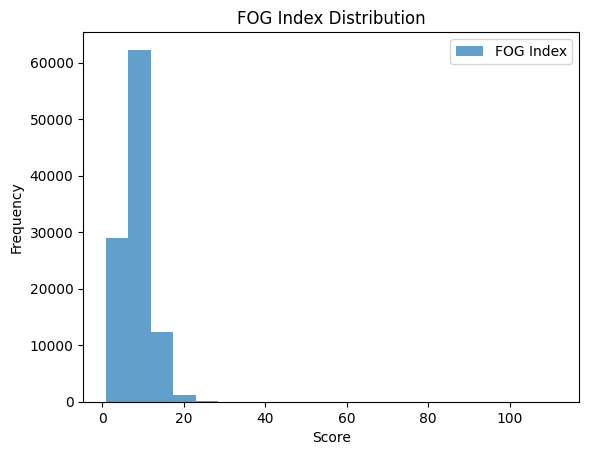

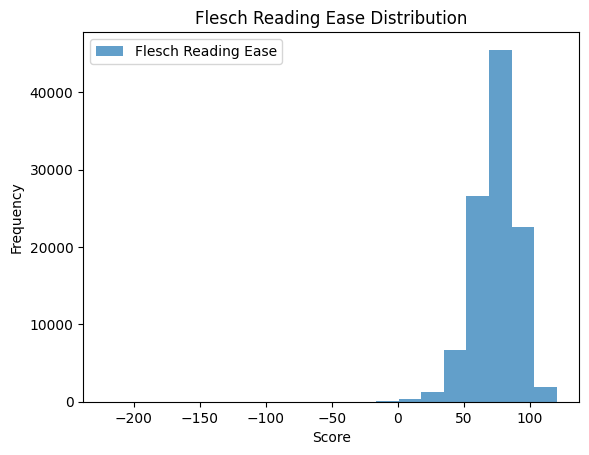

In [9]:
# 1. 생성된 파일 다시 읽기
result_df = pd.read_csv(output_file)

# 2. 새로 생성된 열 정보 확인
# 열 이름
new_columns = ["FOG Index", "Flesch Reading Ease"]

# 각 열의 통계 정보 출력
for column in new_columns:
    print(f"--- {column} ---")
    print(f"개수: {result_df[column].count()}")  # 값의 개수
    print(f"평균: {result_df[column].mean():.2f}")  # 평균
    print(f"최소값: {result_df[column].min():.2f}")  # 최소값
    print(f"최대값: {result_df[column].max():.2f}")  # 최대값
    print(f"표준편차: {result_df[column].std():.2f}")  # 표준편차
    print()

# 3. 추가: 값의 분포 히스토그램 그리기 (옵션)
import matplotlib.pyplot as plt

for column in new_columns:
    plt.hist(result_df[column].dropna(), bins=20, alpha=0.7, label=column)
    plt.title(f"{column} Distribution")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()